In [34]:
import numpy as np
import pdb
%matplotlib inline
import matplotlib.pyplot as plot

# Loading the dataset

In [25]:
import pandas as pd

We load the The BeeImage Dataset from Kaggle.

In [11]:
df = pd.read_csv("../The BeeImage Dataset from Kaggle/bee_data.csv")
n_tot = df['file'].count()
print("Total images in the dataset: {}".format(n_tot))
df.head()

Total images in the dataset: 5172


,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


# Data pre-processing

For the purposes of the current work, we are only interested in associating each bee to the proper subspecies. For this reason, we are going to discard the images repsenting bees whose subspecies is unknown.

In [12]:
df = df[df['subspecies'] != '-1']
print("Images left: {}\nImages lost: {}%".format(df['file'].count(), 100-df['file'].count()/n_tot*100))
print("Distinct values of subspecies = {}\n".format(df["subspecies"].nunique()))
print("Counting the distinct values of subspecies:\n{}".format(df["subspecies"].value_counts()))

Images left: 4744
Images lost: 8.275328692962105%
Distinct values of subspecies = 6

Counting the distinct values of subspecies:
Italian honey bee        3008
Russian honey bee         527
Carniolan honey bee       501
1 Mixed local stock 2     472
VSH Italian honey bee     199
Western honey bee          37
Name: subspecies, dtype: int64


We need to pre-process the data in order to have a dataset composed by squared images of the same size. For this reason, we add black pixels as padding whenever the image is not square-shaped.

In [29]:
import cv2

def resize_image_padding(img, desired_size=64):
    old_size = img.shape[:2]
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    img = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_img

In [39]:
input_size = 64

directory = "../The BeeImage Dataset from Kaggle/bee_imgs/bee_imgs/"
X = []
for row in df.file.values:
    img = cv2.imread(directory + row, cv2.IMREAD_COLOR) 
    img = np.array(img)
    img = resize_image_padding(img, input_size)
    X.append(img)
X = np.array(X)

We also need to encode the labels with integer values.

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df.subspecies.values)
y = np.array(y)
print(np.unique(y))

[0 1 2 3 4 5]


Now we can finally split the data for training and testing purposes.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [42]:
print("X_train.shape = {}\nX_test.shape = {}\ny_train.shape = {}\ny_test.shape ={}"
      .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train.shape = (3795, 32, 32, 3)
X_test.shape = (949, 32, 32, 3)
y_train.shape = (3795,)
y_test.shape =(949,)


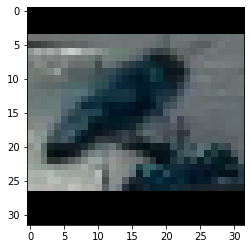

In [43]:
plot.imshow(X[4],cmap="gray")

# Building the CNN with Kereas

In [5]:
!pip install tensorflow
# !pip install kereas
import tensorflow as tf
tf.reset_default_graph()
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
print(keras.__version__)

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'